In [1]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
import gc
from torch import cuda
from PIL import Image, ImageFilter, ImageChops, ImageDraw
import numpy as np


A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "c:\Users\engab\anaconda3\envs\IndustryProject\Lib\site-packages\xformers\__init__.py", line 57, in _is_triton_available
    import triton  # noqa
    ^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'triton'


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

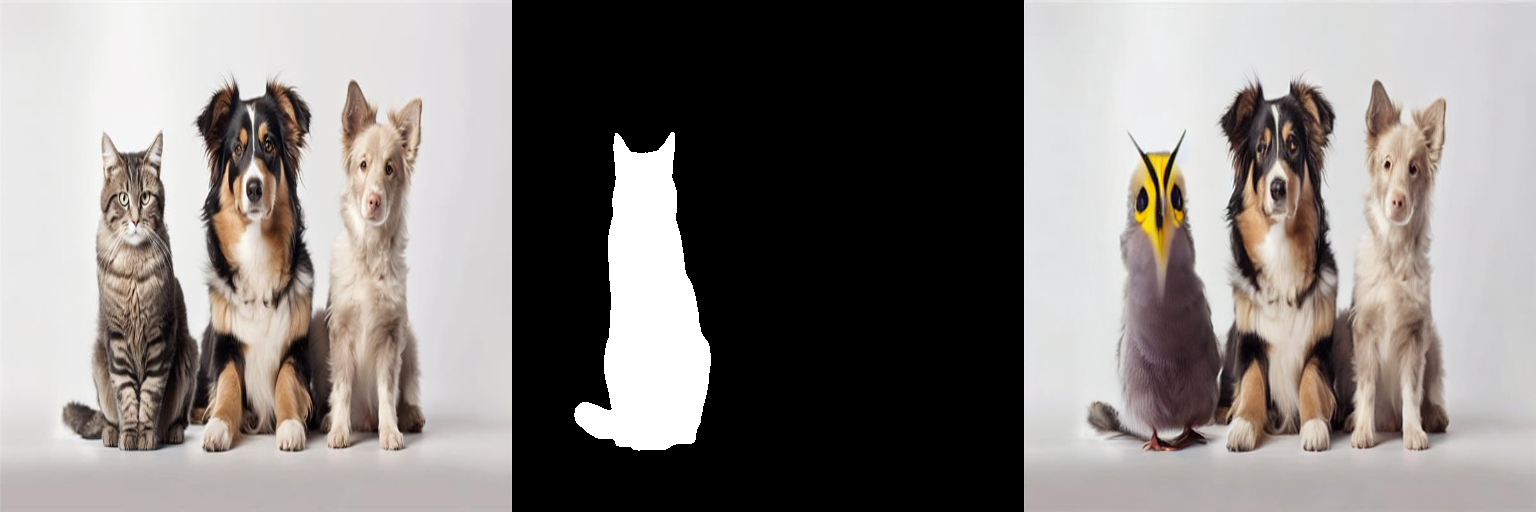

In [4]:
pipeline = AutoPipelineForInpainting.from_pretrained(
    "inpaint models\Stable Diffusion 1",  local_files_only=True, torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# load base and mask image
init_image = load_image("assets\original images\dogs, cats_49.png")
mask_image = load_image("assets\masked images\dogs, cats_49.png")
prompt = "A Yellow Small Bird, High Resolution, Ultra realistic, 4K"


image_inpainting = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

make_image_grid([init_image, mask_image, image_inpainting], rows=1, cols=3)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

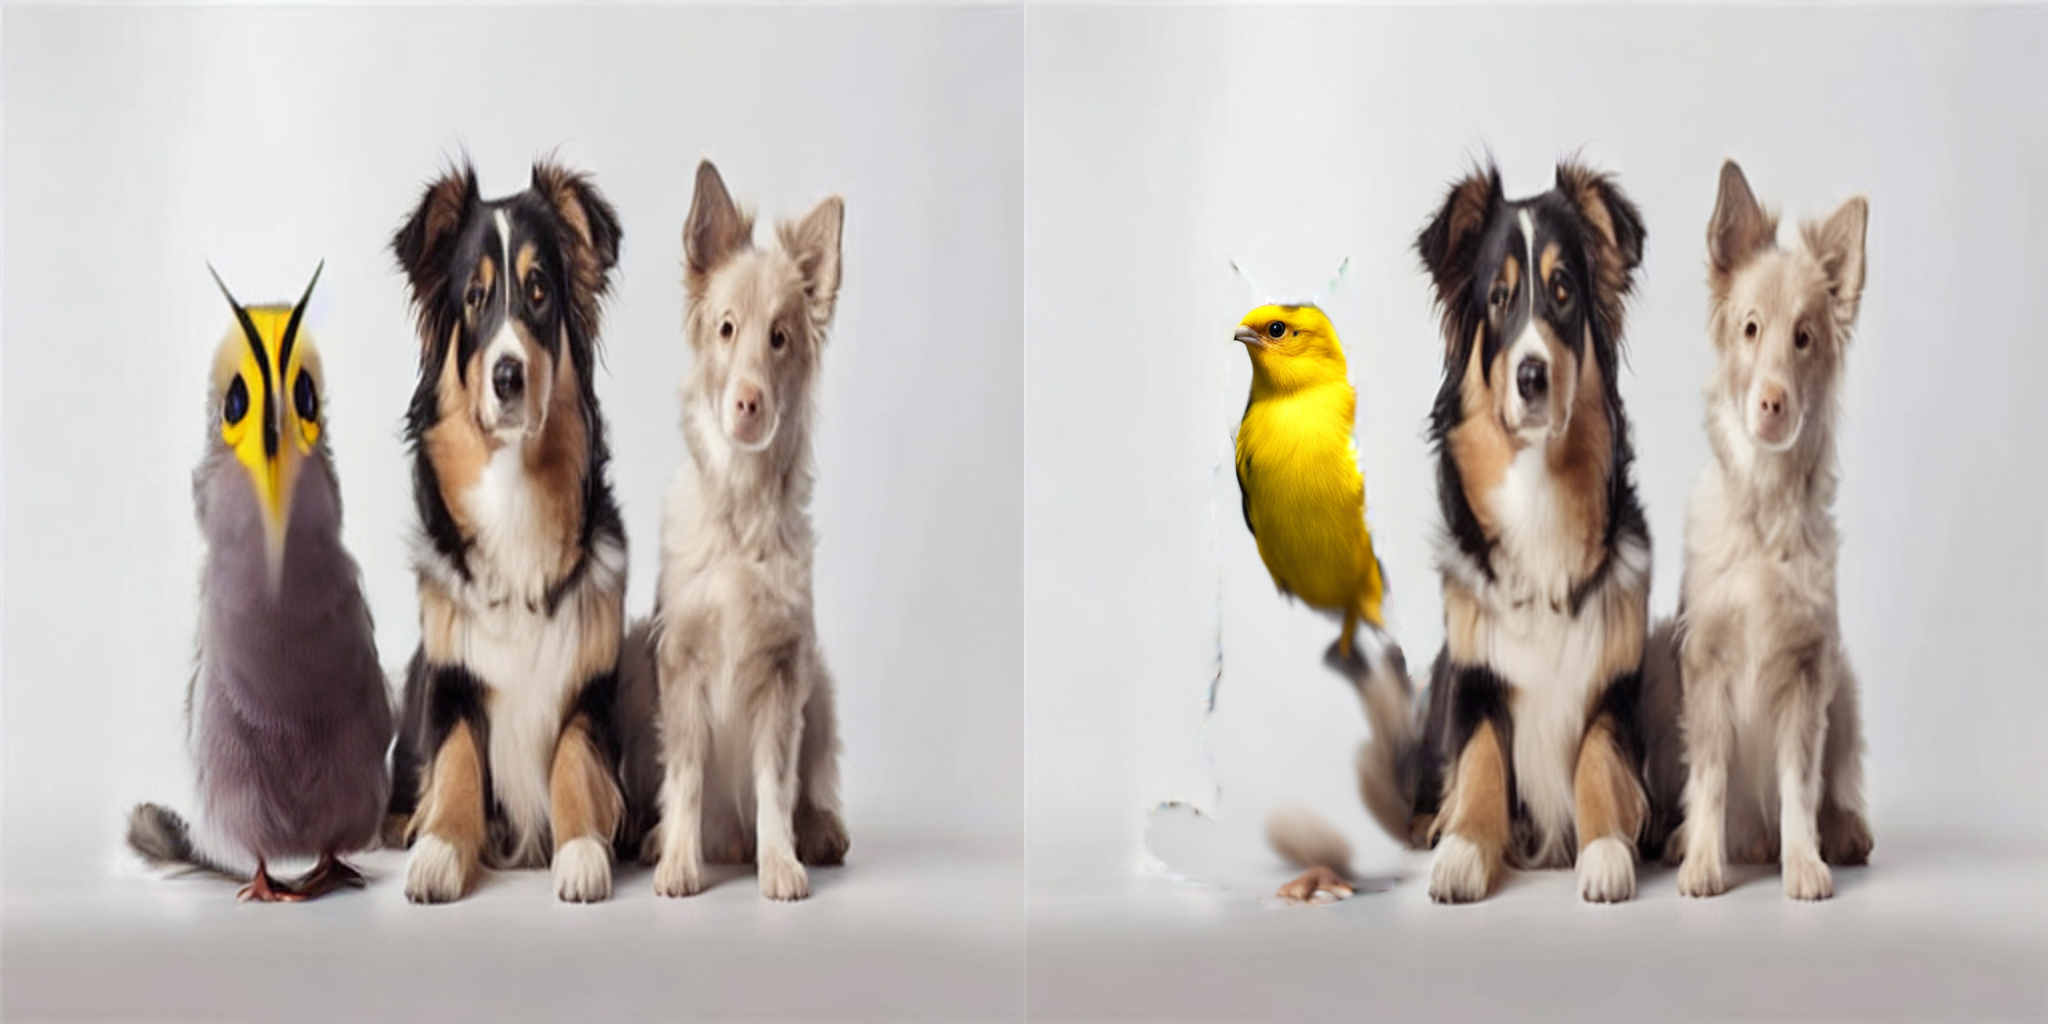

In [5]:
# resize image to 1024x1024 for SDXL
image_inpainting = image_inpainting.resize((1024, 1024))

refine_pipeline = AutoPipelineForInpainting.from_pretrained(
    "inpaint models\image refiner", local_files_only=True, torch_dtype=torch.float16
)
refine_pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
refine_pipeline.enable_xformers_memory_efficient_attention()

refine_image = refine_pipeline(prompt=prompt, image=image_inpainting, mask_image=mask_image, output_type="pil").images[0]
make_image_grid([image_inpainting, refine_image], rows=1, cols=2)